<a href="https://colab.research.google.com/github/sonephyo/CSC365Assignments/blob/main/Market_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving financialMarketData.csv to financialMarketData.csv


{'financialMarketData.csv': b'Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN\r\n0,1/11/2000,283.250,0.077,1388.000,157.260,100.560,105.860,1.646,25.770,22.500,6.671,6.657,6.428,5.426,5.781,6.121,5.541,4.316,2.890,6.321,5.777,4.495,2.422,1.709,0.346,4.535,4.770,6.524,870.940,474.045,990.750,546.040,305.057,116.464,230.527,123.762,1416.120,127.750,990.590,856.760,224.330,217.340,34.300\r\n0,1/18/2000,287.650,0.043,1405.000,165.010,101.860,105.470,1.638,28.850,21.500,6.747,6.748,6.465,5.378,5.803,6.254,5.644,4.321,3.030,6.459,5.889,4.535,2.418,1.765,0.349,4.746,4.975,6.613,869.330,473.223,990.480,545.680,305.303,117.267,231.377,123.762,1428.790,129.500,993.980,925.220,234.370,227.080,32.740\r\n0,1/25/2000,287.150,0.135,1368.000,

In [94]:
import pandas as pd
df = pd.read_csv('financialMarketData.csv')
pd.set_option('display.max_columns', None)
df.head()

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')


In [5]:
selected_columns = ['CRY', 'VIX', 'BDIY']
df_selected = df[selected_columns]
df_selected.head()

CRY    VIX    BDIY
0  157.26  22.50  1388.0
1  165.01  21.50  1405.0
2  167.24  23.02  1368.0
3  166.85  23.45  1311.0
4  165.43  21.25  1277.0

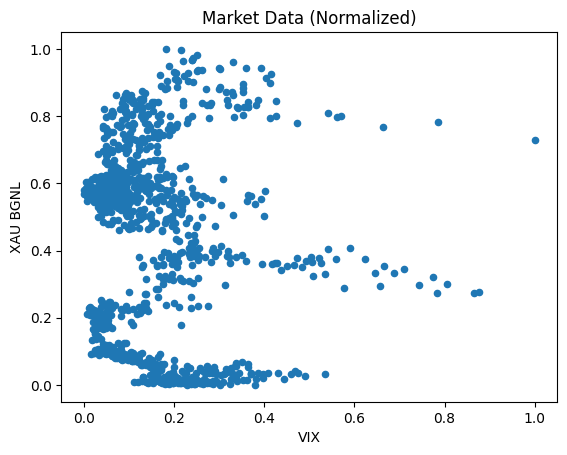

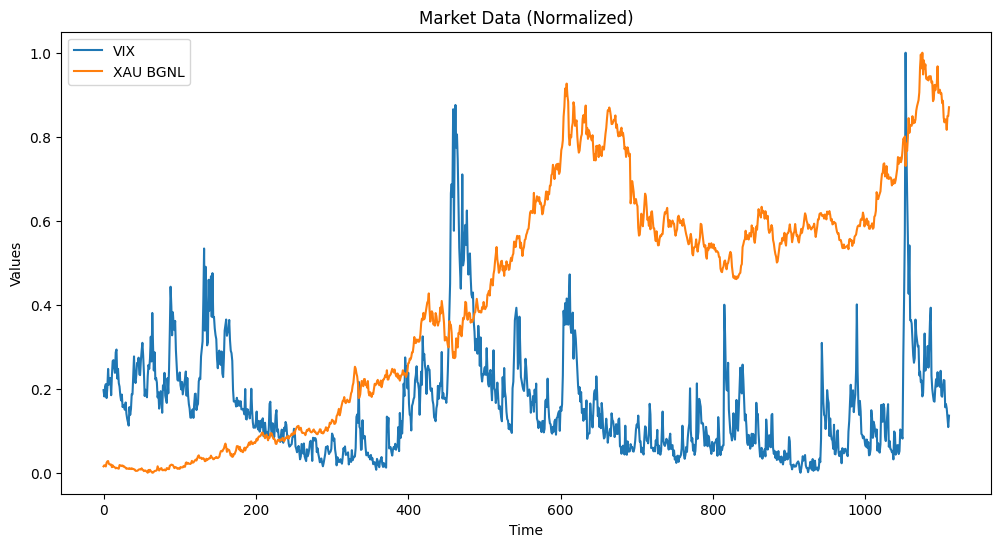

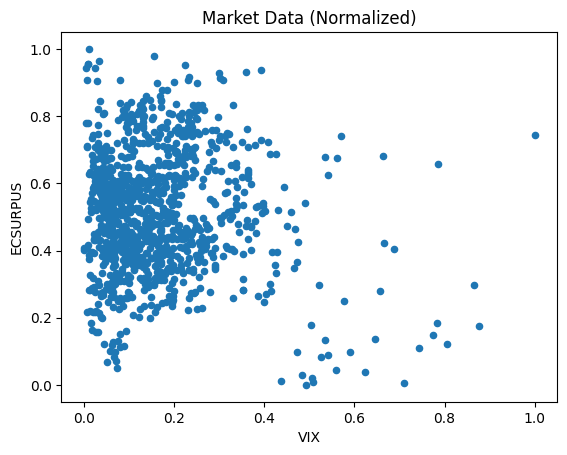

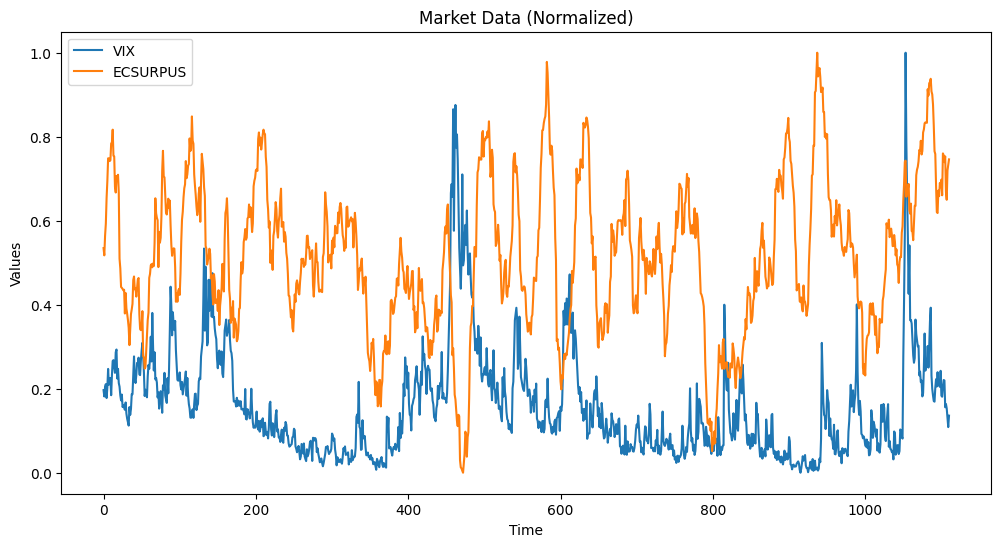

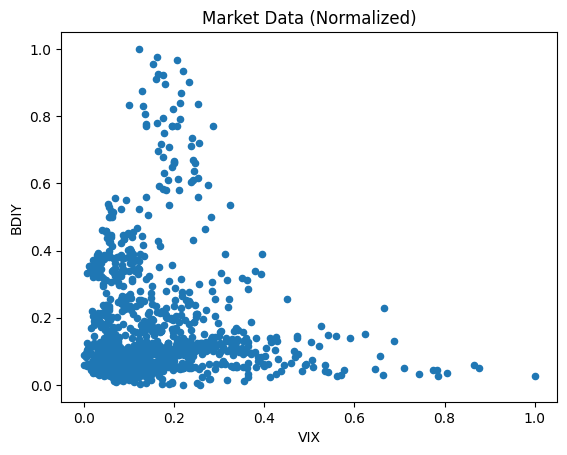

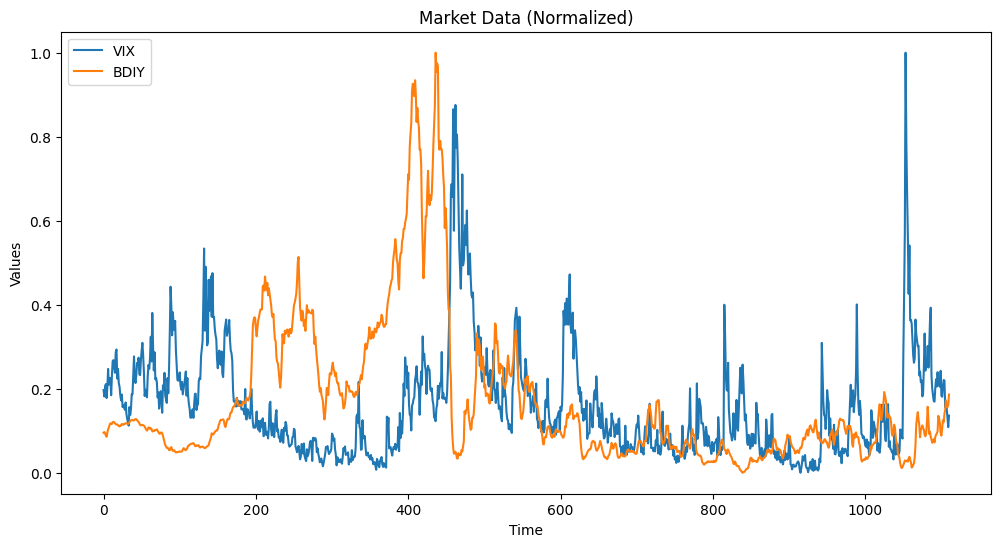

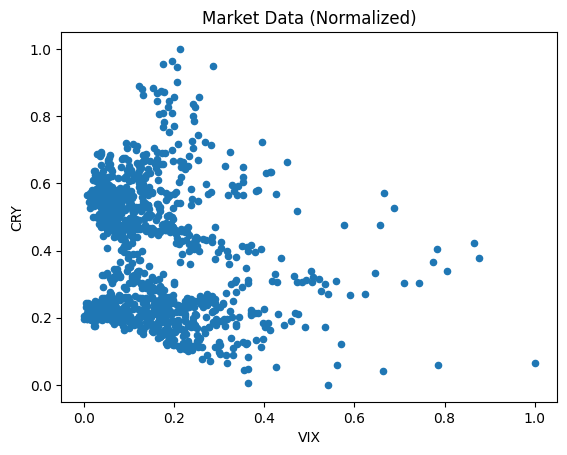

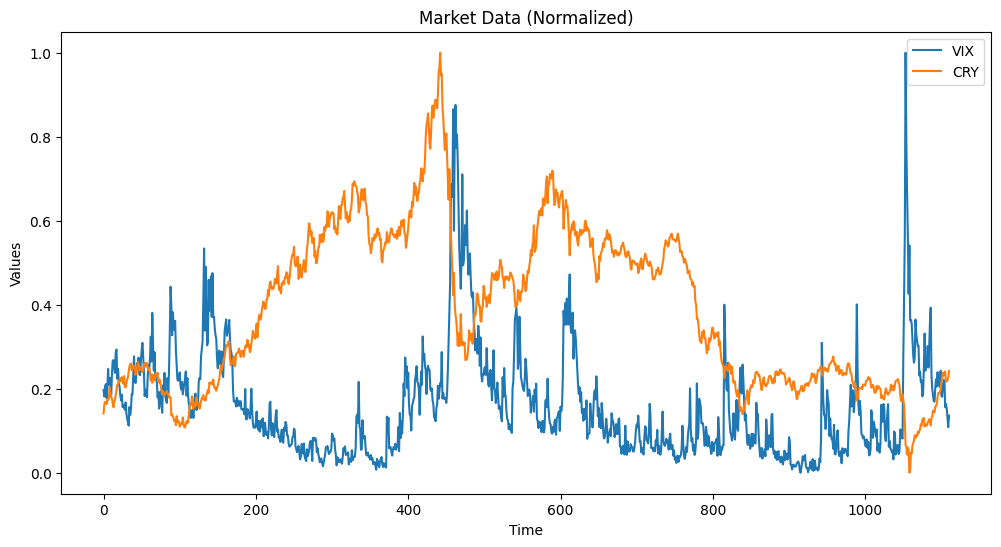

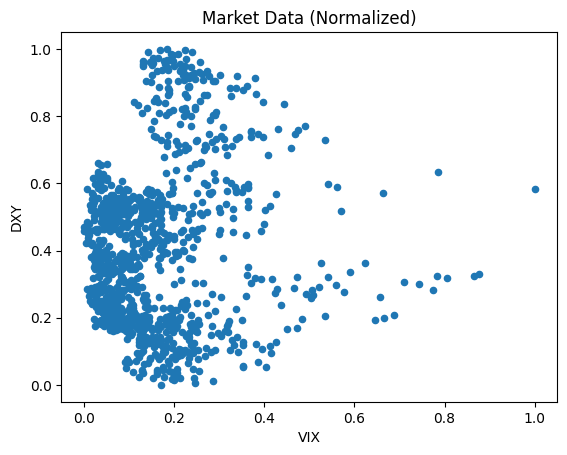

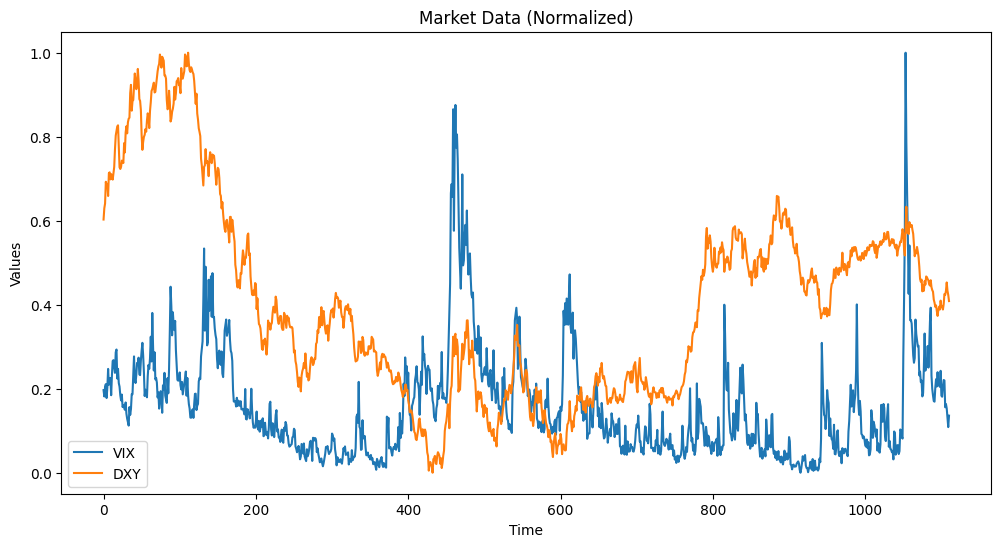

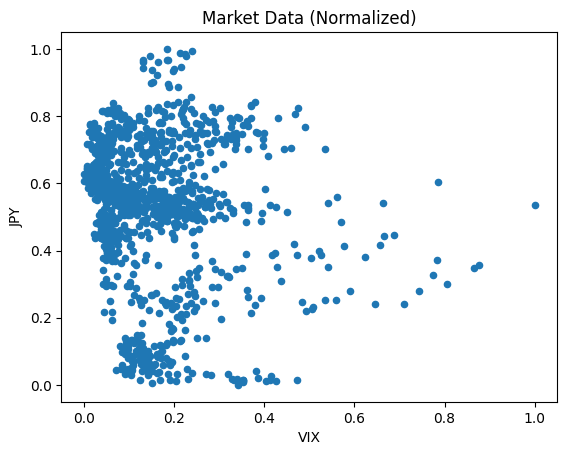

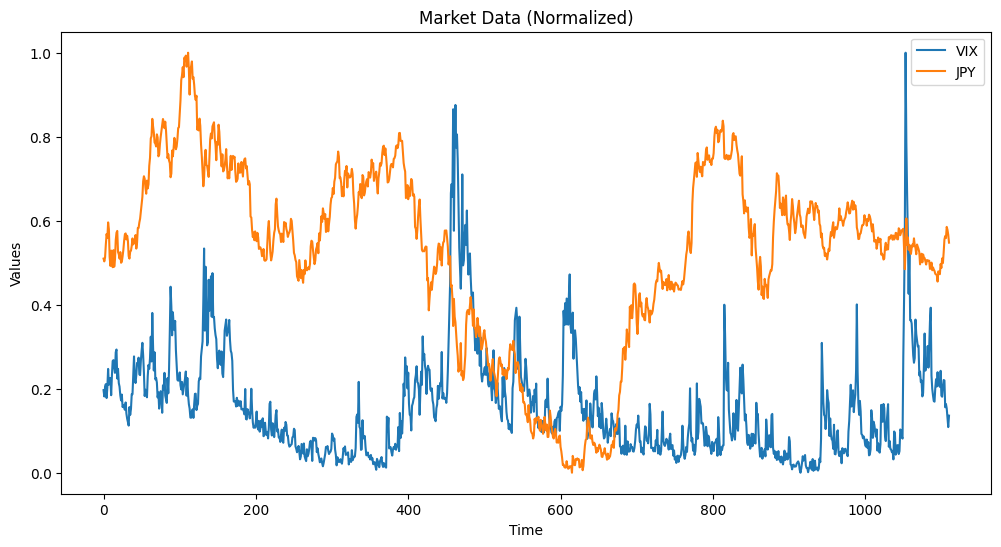

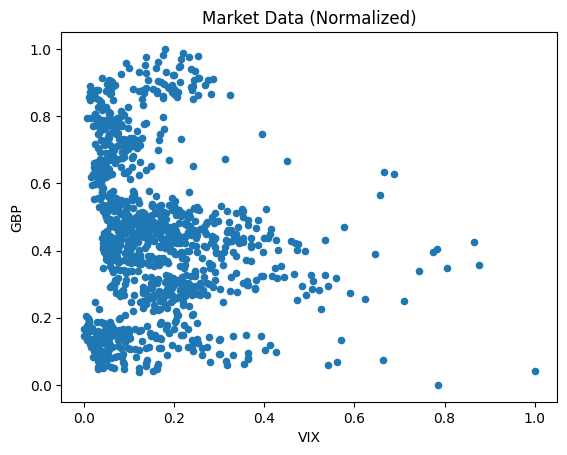

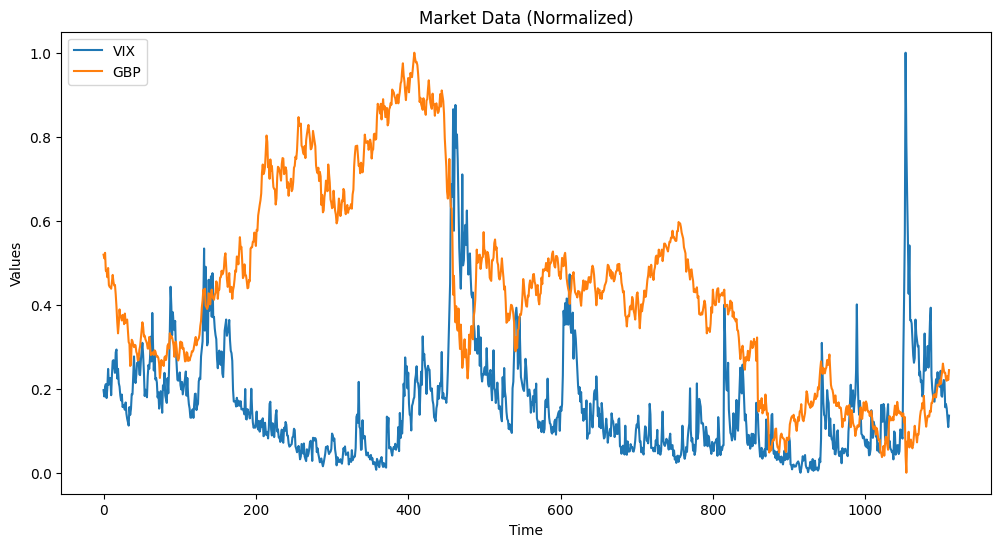

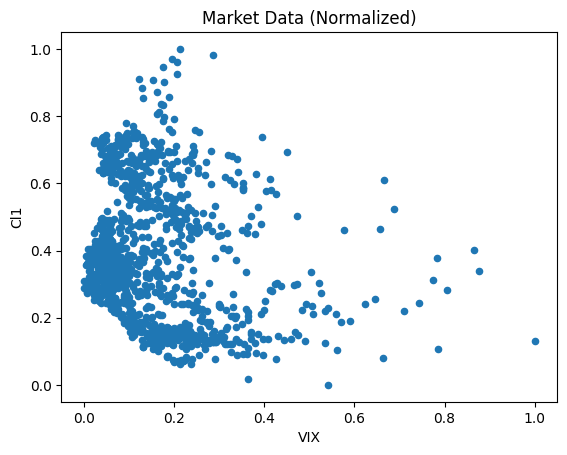

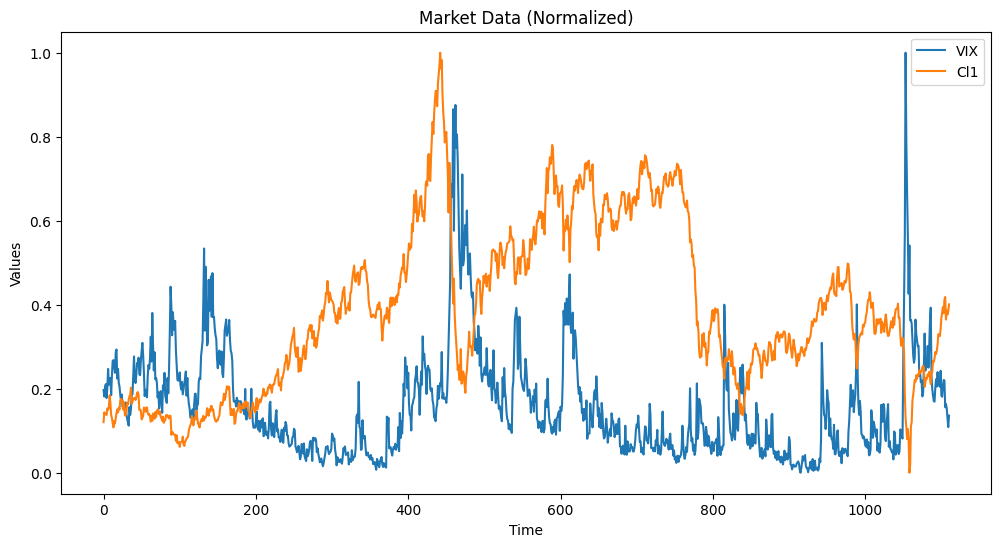

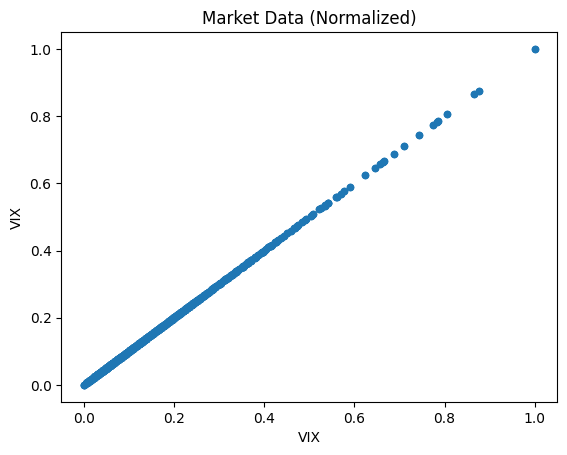

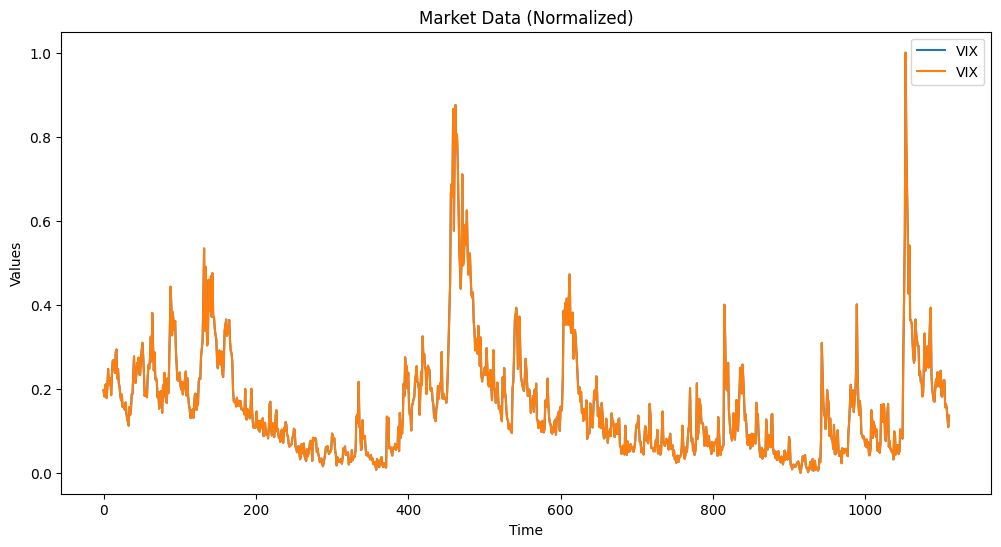

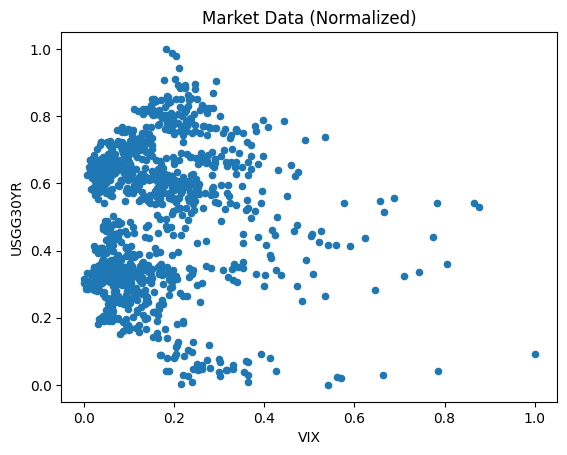

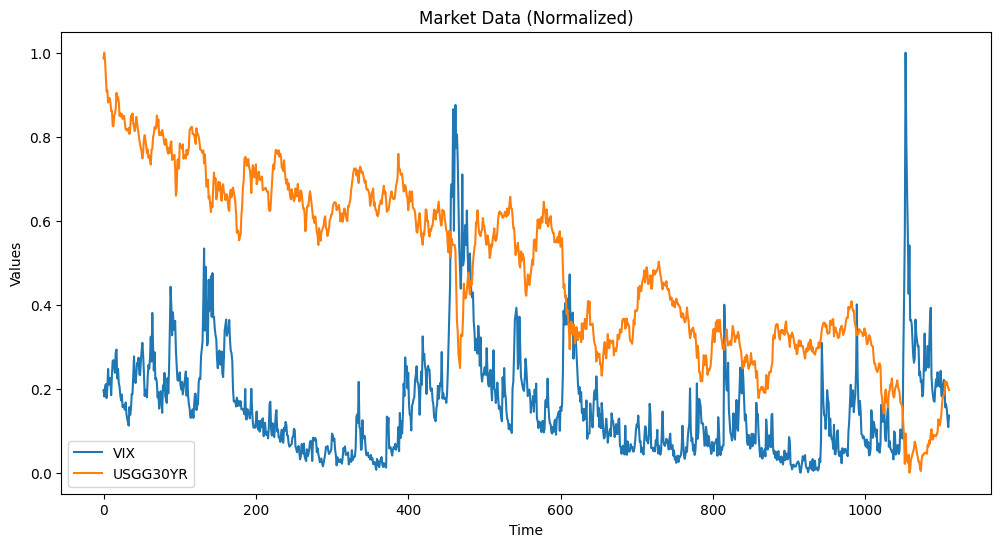

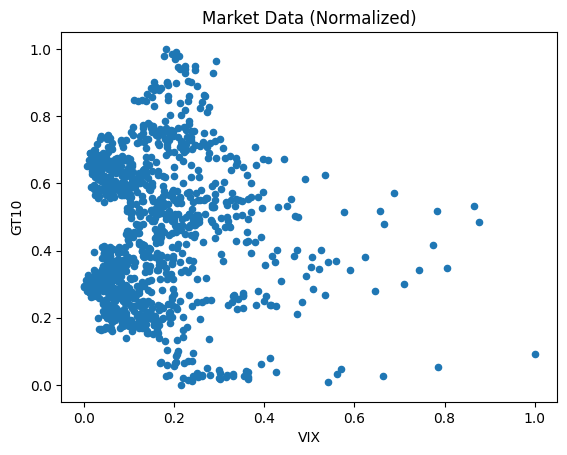

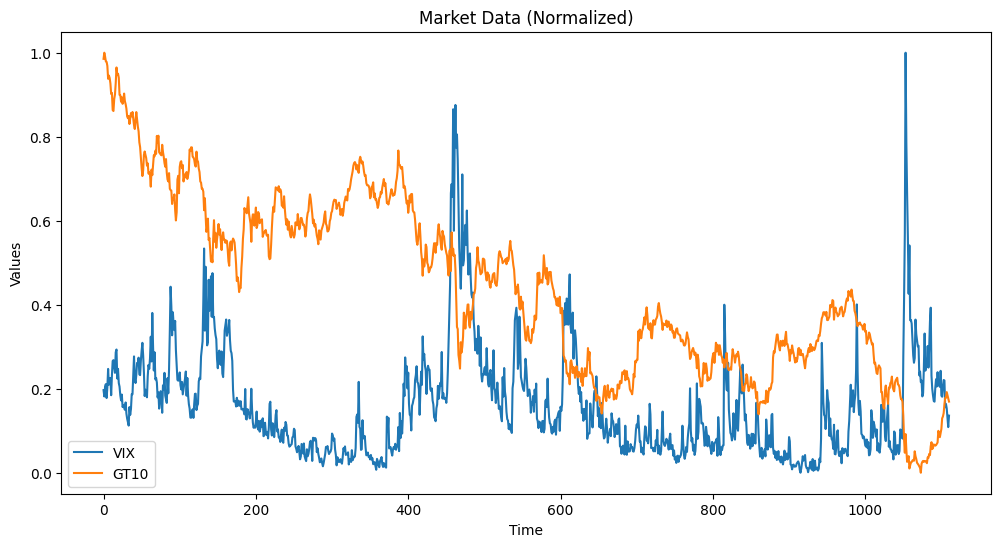

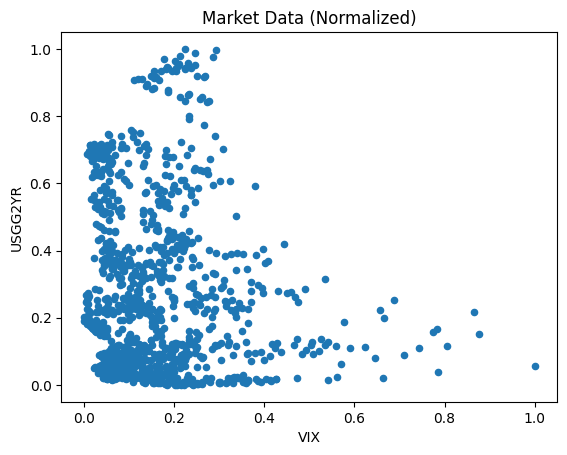

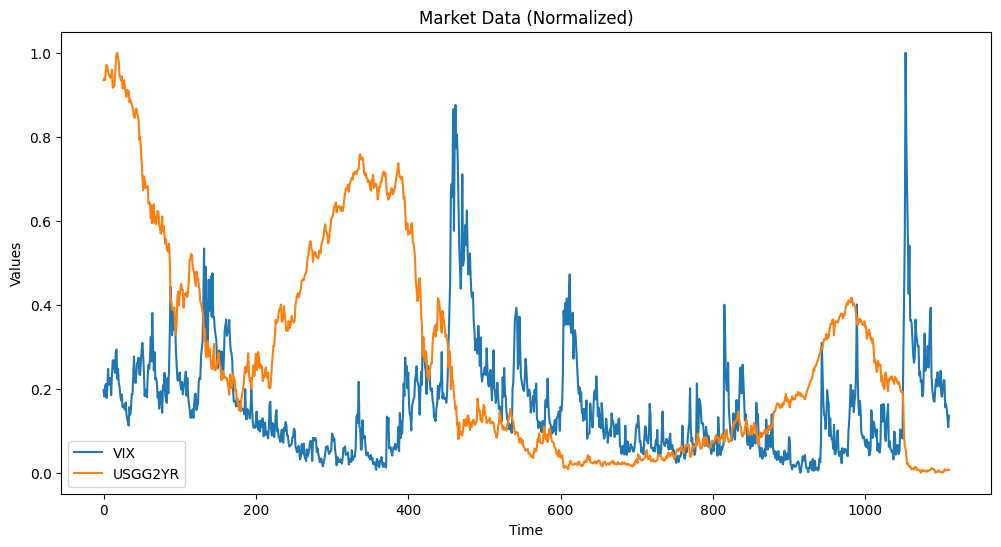

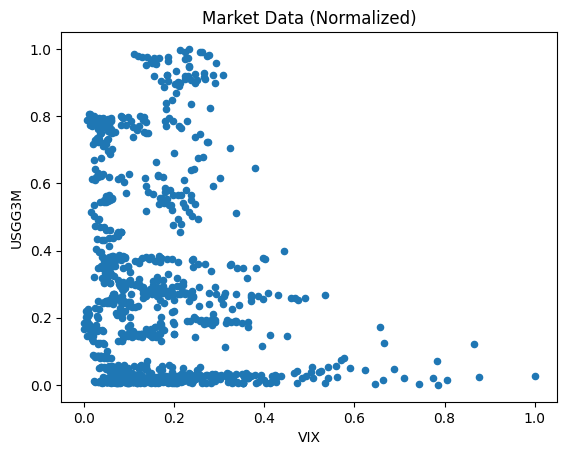

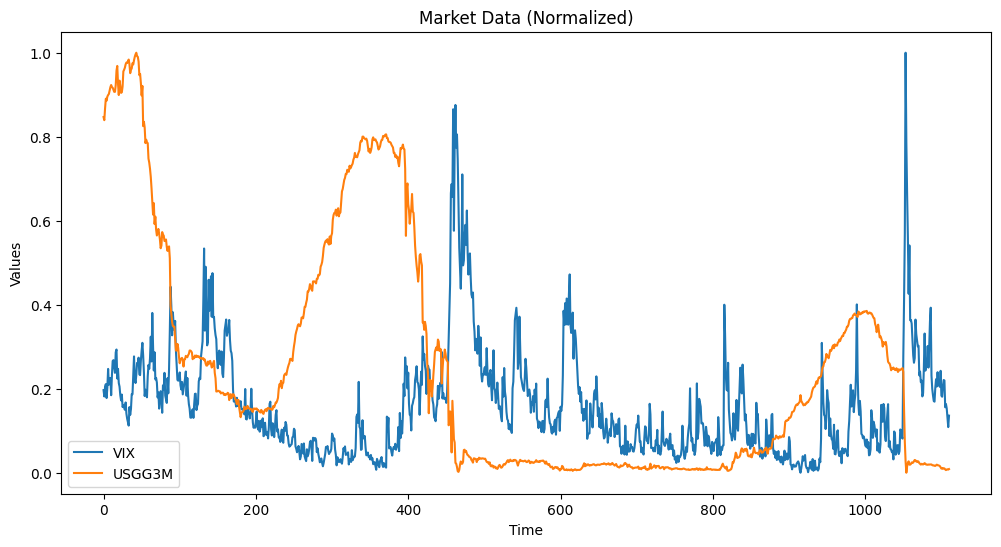

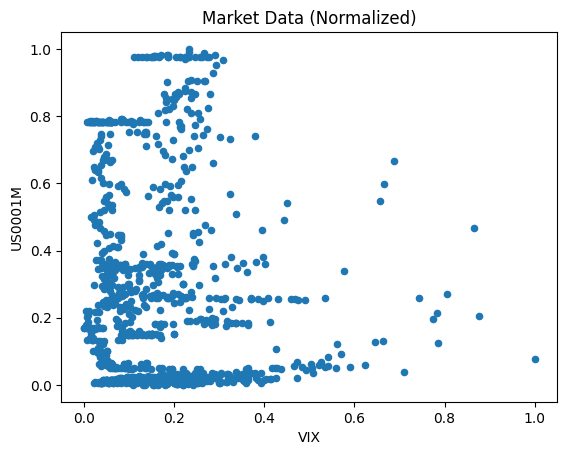

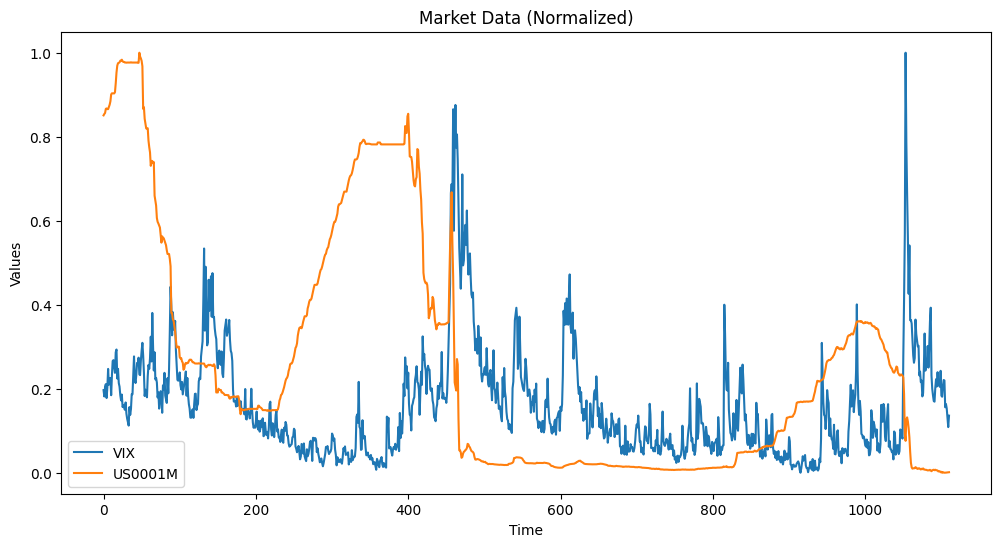

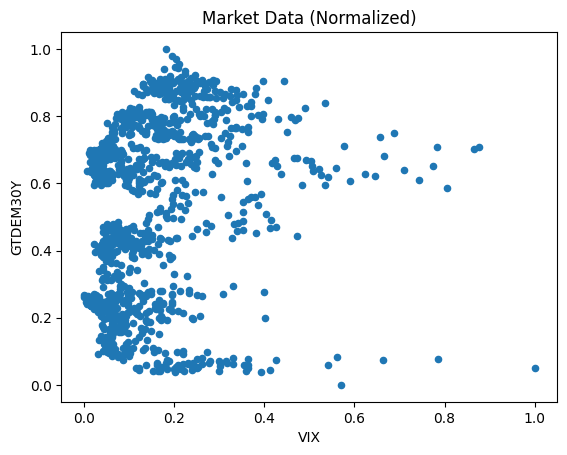

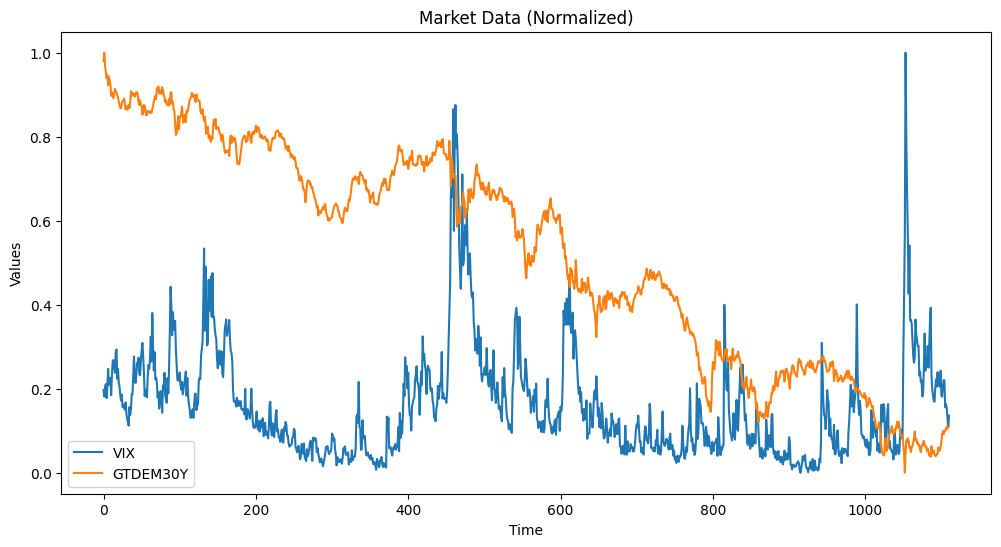

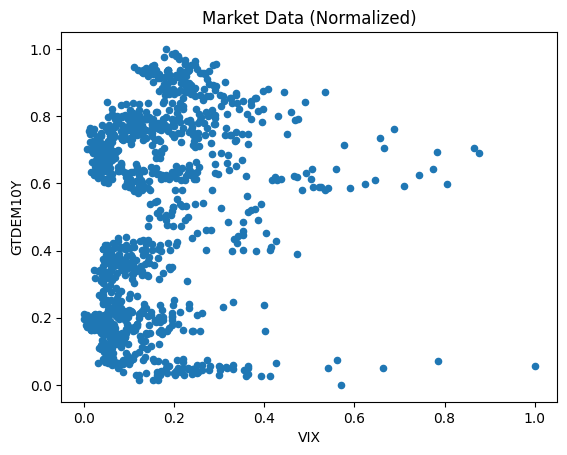

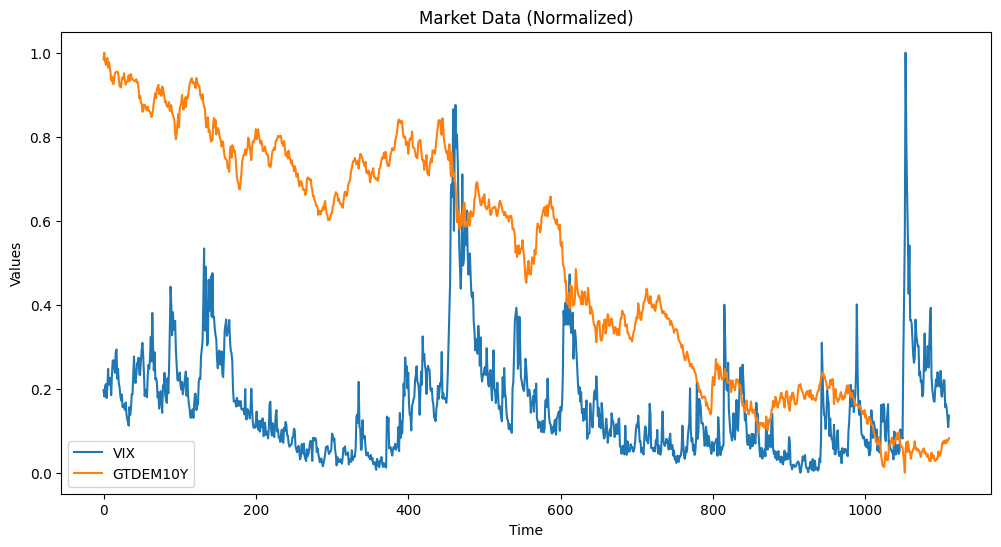

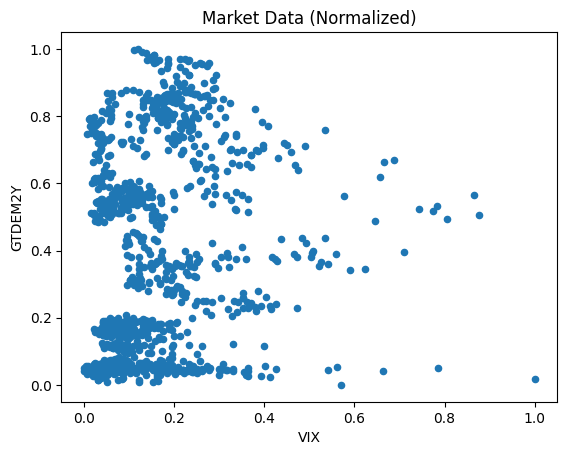

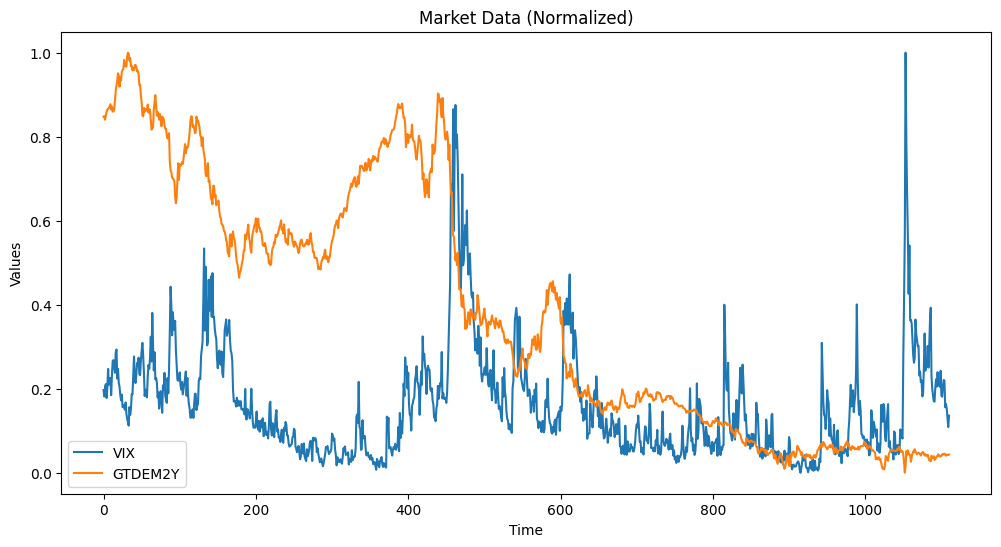

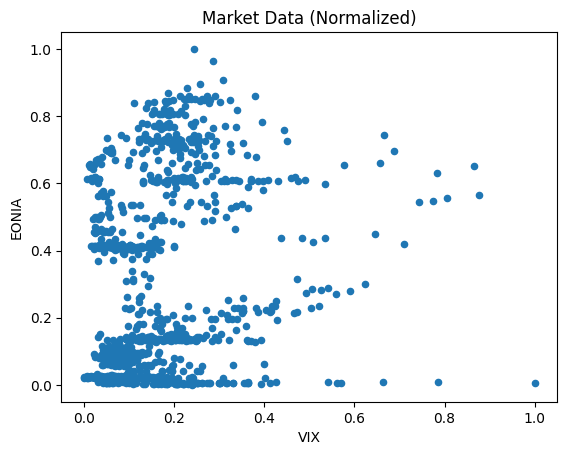

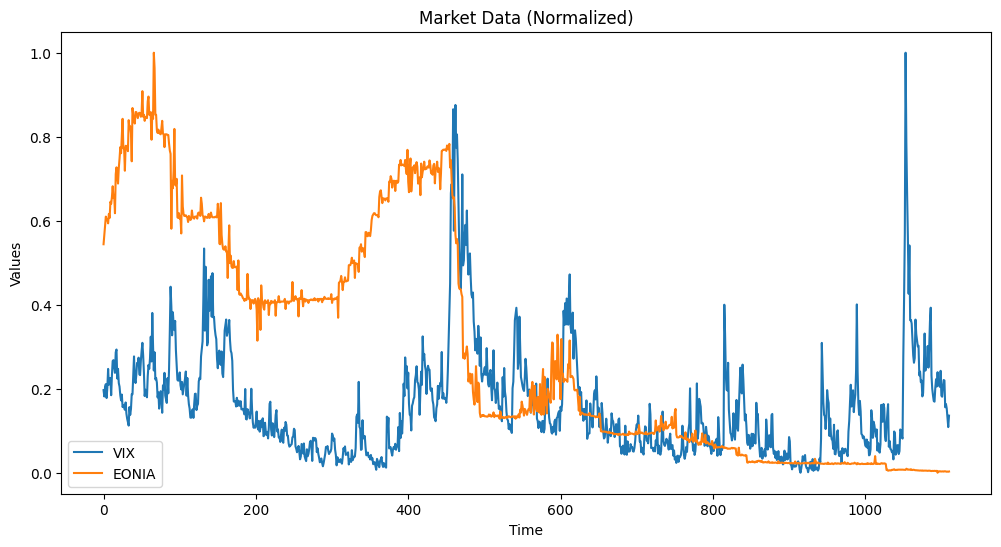

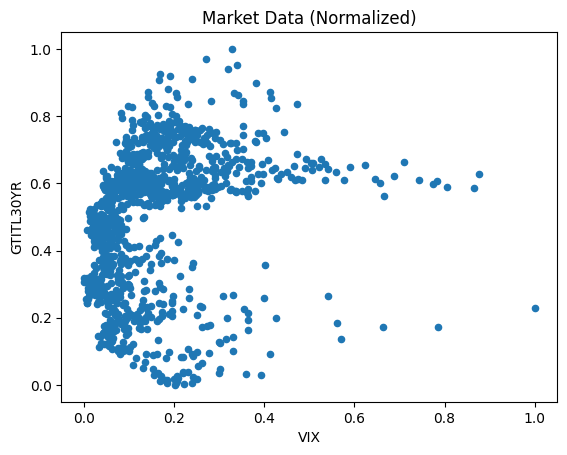

KeyboardInterrupt: 

In [6]:
# selected_columns = ['CRY', 'VIX', 'XAU BGNL'] # CRY - commodity future prices, VIX - the changes in the stock, XAU - goldB
# selected_columns = ['CRY', 'VIX', 'BDIY', 'DXY', 'JPY'] # BIDY has a huge spike down during the 2008 recession
# selected_columns = ['CRY', 'VIX']
# df_selected = df[selected_columns]
# df_selected.head()

# df_selected.plot(figsize=(12, 6))
# plt.title('Market Data')
# plt.xlabel('Time')
# plt.ylabel('Values')
# plt.legend(loc='best')
# plt.show()

# Scatter Plot
# selected_columns = ['CRY', 'VIX', 'XAU BGNL']
# df_selected = df[selected_columns]

import matplotlib.pyplot as plt
def plotScatter(x_axis_Data, y_axis_Data, df, normalize_method='min-max'):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    # Select the columns for plotting
    selected_columns = [x_axis_Data, y_axis_Data]
    df_selected = df[selected_columns]

    # Normalize the data if specified
    if normalize_method == 'min-max':
        scaler = MinMaxScaler()
    elif normalize_method == 'z-score':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid normalization method. Choose 'min-max' or 'z-score'.")

    # Apply normalization to both columns
    df_selected_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=selected_columns)

    # Scatter plot of normalized data
    df_selected_normalized.plot(x=x_axis_Data, y=y_axis_Data, kind='scatter')
    plt.title('Market Data (Normalized)')
    plt.xlabel(x_axis_Data)
    plt.ylabel(y_axis_Data)
    plt.show()

    # Line plot of normalized data
    df_selected_normalized.plot(figsize=(12, 6))
    plt.title('Market Data (Normalized)')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend(loc='best')
    plt.show()

    return df_selected_normalized.head()

market_indicators = [
    "XAU BGNL", "ECSURPUS", "BDIY", "CRY", "DXY", "JPY", "GBP", "Cl1", "VIX",
    "USGG30YR", "GT10", "USGG2YR", "USGG3M", "US0001M", "GTDEM30Y", "GTDEM10Y",
    "GTDEM2Y", "EONIA", "GTITL30YR", "GTITL10YR", "GTITL2YR", "GTJPY30YR",
    "GTJPY10YR", "GTJPY2YR", "GTGBP30Y", "GTGBP20Y", "GTGBP2Y", "LUMSTRUU",
    "LMBITR", "LUACTRUU", "LF98TRUU", "LG30TRUU", "LP01TREU", "EMUSTRUU",
    "LF94TRUU", "MXUS", "MXEU", "MXJP", "MXBR", "MXRU", "MXIN", "MXCN"
]
for indicator in market_indicators:
  plotScatter("VIX", indicator, df, normalize_method='min-max')


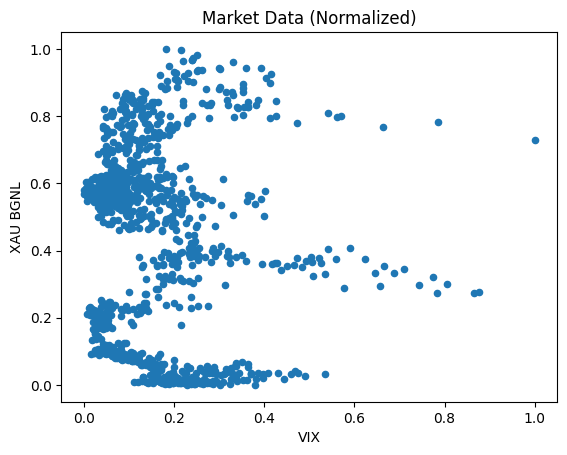

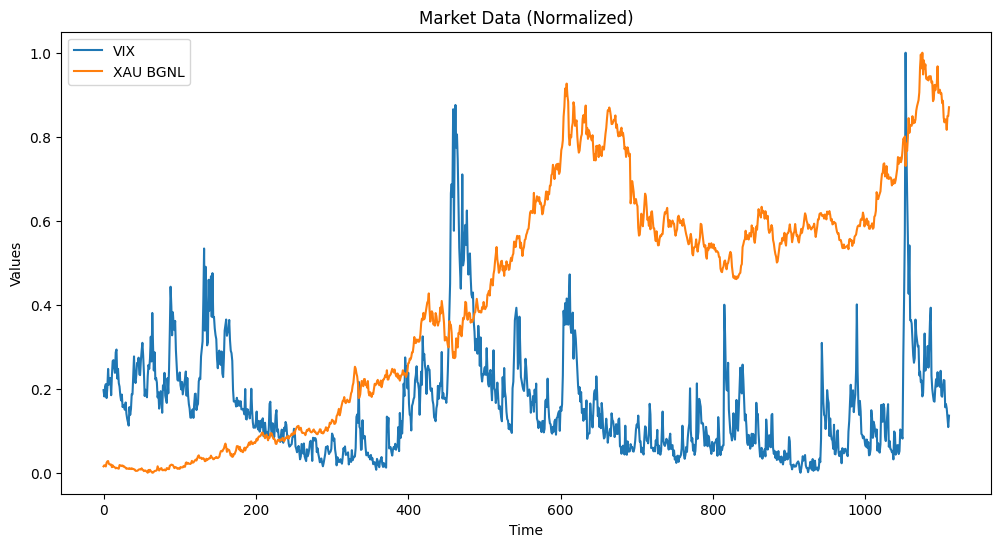

<ipython-input-7-8faedcc444ea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly'] = model.fit_predict(scaled_data)  # -1 for anomalies, 1 for normal


        VIX  XAU BGNL  anomaly
64    34.72    256.68       -1
88    38.87    287.75       -1
132   44.92    313.75       -1
134   42.03    305.35       -1
138   39.97    313.95       -1
141   40.52    327.85       -1
143   41.02    318.55       -1
456   53.68    873.60       -1
457   55.13    840.95       -1
458   53.11    772.45       -1
459   66.96    735.54       -1
460   47.73    760.24       -1
461   61.44    733.95       -1
462   67.64    739.41       -1
463   60.90    816.60       -1
464   62.98    782.18       -1
465   58.91    778.37       -1
466   52.37    839.00       -1
467   45.02    835.22       -1
468   41.63    869.90       -1
470   43.27    825.35       -1
471   56.65    859.95       -1
473   43.06    896.00       -1
474   46.67    912.45       -1
475   48.66    968.75       -1
476   45.49    965.30       -1
477   50.93    912.25       -1
478   44.37    894.08       -1
480   42.93    924.00       -1
481   44.14    919.90       -1
604   35.06   1740.90       -1
606   36

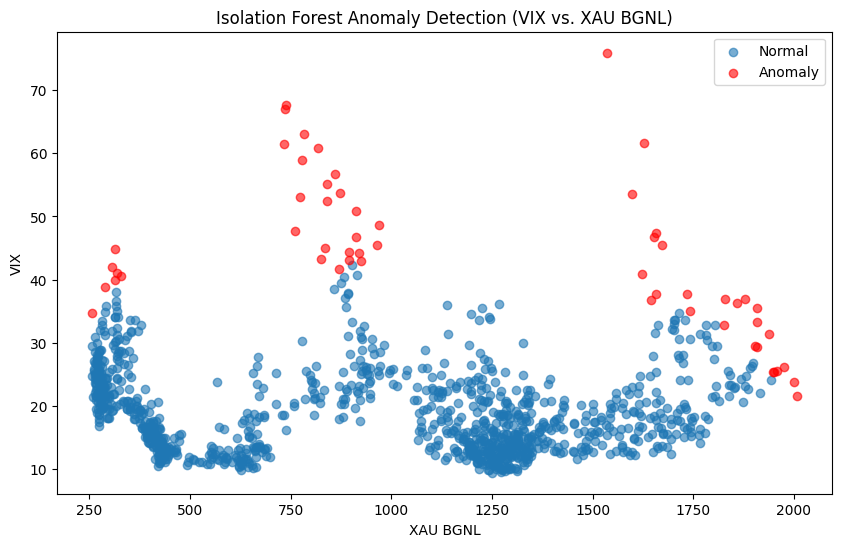

In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def anomalyDetection(x_axis_Data, y_axis_Data):
  selected_columns = [x_axis_Data, y_axis_Data]
  data = df[selected_columns]

  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)

  model = IsolationForest(n_estimators=150, contamination=0.05, random_state=42)
  data['anomaly'] = model.fit_predict(scaled_data)  # -1 for anomalies, 1 for normal

  # Separate normal and anomaly points
  normal_data = data[data['anomaly'] == 1]
  anomaly_data = data[data['anomaly'] == -1]

  print(anomaly_data)

  # Visualize the results
  plt.figure(figsize=(10, 6))
  plt.scatter(normal_data[y_axis_Data], normal_data[x_axis_Data], label='Normal', alpha=0.6)
  plt.scatter(anomaly_data[y_axis_Data], anomaly_data[x_axis_Data], label='Anomaly', color='red', alpha=0.6)
  plt.title("Isolation Forest Anomaly Detection (VIX vs. XAU BGNL)")
  plt.xlabel(y_axis_Data)
  plt.ylabel(x_axis_Data)
  plt.legend()
  plt.show()
plotScatter("VIX", "XAU BGNL", df)
anomalyDetection("VIX", "XAU BGNL")

<ipython-input-9-8f91c4c84146>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly'] = model.fit_predict(scaled_data)  # -1 for anomalies, 1 for normal


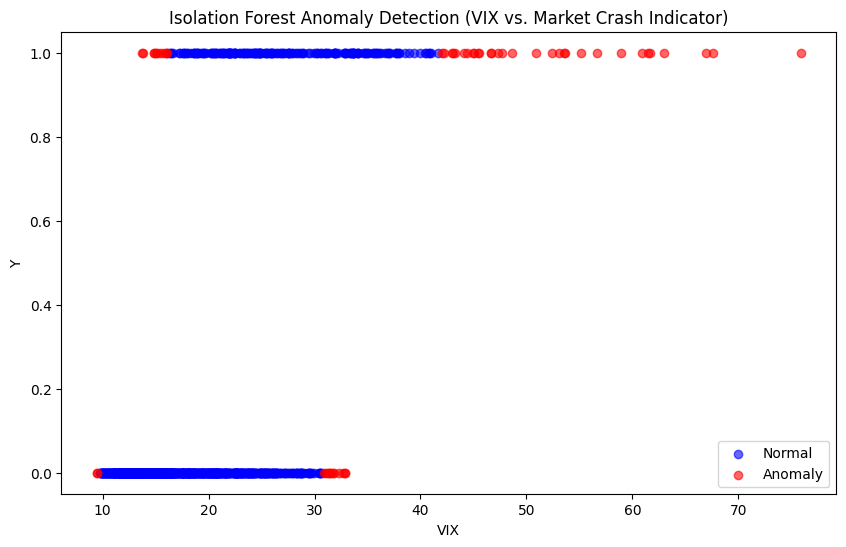

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def anomalyDetection(y_column, vix_column, df):
    # Select the relevant columns (Y and VIX)
    selected_columns = [y_column, vix_column]
    data = df[selected_columns]

    # Standardize the data (important for Isolation Forest)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Initialize Isolation Forest model
    model = IsolationForest(n_estimators=150, contamination=0.05, random_state=42)
    data['anomaly'] = model.fit_predict(scaled_data)  # -1 for anomalies, 1 for normal

    # Separate normal and anomaly points
    normal_data = data[data['anomaly'] == 1]
    anomaly_data = data[data['anomaly'] == -1]

    # Visualize the results
    plt.figure(figsize=(10, 6))

    # Plot normal data
    plt.scatter(normal_data[vix_column], normal_data[y_column], label='Normal', alpha=0.6, color='blue')

    # Plot anomaly data
    plt.scatter(anomaly_data[vix_column], anomaly_data[y_column], label='Anomaly', color='red', alpha=0.6)

    # Add plot titles and labels
    plt.title("Isolation Forest Anomaly Detection (VIX vs. Market Crash Indicator)")
    plt.xlabel(vix_column)
    plt.ylabel(y_column)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Example Usage
# Assuming df is your DataFrame containing the market crash indicator and VIX columns
# df should have 'Y' as the market crash column (0 or 1) and 'VIX' as the VIX values.
anomalyDetection('Y', 'VIX', df)


In [10]:
import joblib

def save_model_and_scaler(model, scaler, model_filename='logistic_regression_model.pkl', scaler_filename='scaler.pkl'):
    # Save the trained model to a file
    joblib.dump(model, model_filename)
    # Save the scaler to a file
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler saved as {model_filename} and {scaler_filename}.")


In [11]:
def load_model_and_scaler(model_filename='logistic_regression_model.pkl', scaler_filename='scaler.pkl'):
    # Load the trained model from the file
    model = joblib.load(model_filename)
    # Load the scaler from the file
    scaler = joblib.load(scaler_filename)
    print(f"Model and scaler loaded from {model_filename} and {scaler_filename}.")
    return model, scaler


Model and scaler saved as logistic_regression_model.pkl and scaler.pkl.
Accuracy: 0.8789237668161435
Confusion Matrix:
[[168   9]
 [ 18  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       177
           1       0.76      0.61      0.67        46

    accuracy                           0.88       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.87      0.88      0.87       223



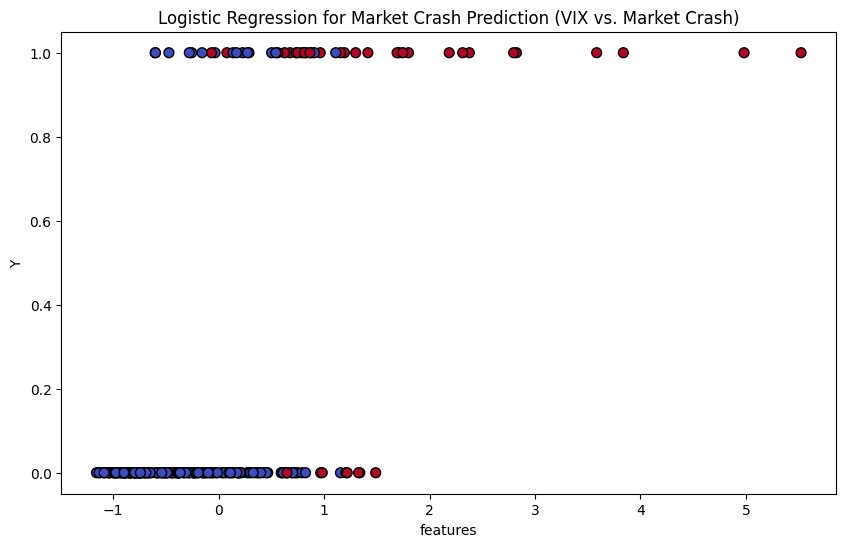

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

def logisticRegressionMarketCrash(df, feature_cols, target_col):
    # Feature (X) is VIX and Target (y) is market crash indicator (Y)
    X = df[feature_cols]  # VIX values as feature
    y = df[target_col]     # Market crash indicator (0 or 1)

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data (important for Logistic Regression)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Save the model and scaler
    save_model_and_scaler(model, scaler)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting the results
    plt.figure(figsize=(10, 6))

    # Plot decision boundary for the first feature (VIX)
    plot_step = 0.01
    vix_values = X_test[:, 0]  # Extract VIX values from X_test
    x_min, x_max = vix_values.min() - 1, vix_values.max() + 1
    xx = np.arange(x_min, x_max, plot_step)

    # Create a dummy dataset for prediction, filling other features with their means
    dummy_data = np.zeros((len(xx), len(feature_cols)))
    dummy_data[:, 0] = xx  # VIX values
    for i in range(1, len(feature_cols)):
        dummy_data[:, i] = X_train[:, i].mean()  # Fill other features with means

    Z = model.predict(dummy_data)
    # --- End of changes ---

    plt.scatter(vix_values, y_test, c=y_pred, edgecolors='k', cmap='coolwarm', s=50) # Changed to use vix_values
    plt.title("Logistic Regression for Market Crash Prediction (VIX vs. Market Crash)")
    plt.xlabel('features')
    plt.ylabel(target_col)
    plt.show()

# Example Usage:
# Assuming df is your DataFrame containing 'VIX' as feature and 'Y' as market crash indicator.
# selected_features = ['VIX', 'DXY', 'CRY', 'BDIY', 'USGG30YR', 'Cl1']
# selected_features = [
#     "XAU BGNL", "ECSURPUS", "BDIY", "CRY", "DXY", "JPY", "GBP", "Cl1", "VIX",
#     "USGG30YR", "GT10", "USGG2YR", "USGG3M", "US0001M", "GTDEM30Y", "GTDEM10Y",
#     "GTDEM2Y", "EONIA", "GTITL30YR", "GTITL10YR", "GTITL2YR", "GTJPY30YR",
#     "GTJPY10YR", "GTJPY2YR", "GTGBP30Y", "GTGBP20Y", "GTGBP2Y", "LUMSTRUU",
#     "LMBITR", "LUACTRUU", "LF98TRUU", "LG30TRUU", "LP01TREU", "EMUSTRUU",
#     "LF94TRUU", "MXUS", "MXEU", "MXJP", "MXBR", "MXRU", "MXIN", "MXCN"]
selected_features = [ "VIX",
    "USGG30YR",
    "USGG2YR",
    "USGG3M",
    "US0001M",
    "DXY",
    "XAU BGNL",
    "CRY",
    "MXUS"]
logisticRegressionMarketCrash(df, selected_features, 'Y')


In [13]:
import pandas as pd
import joblib
import numpy as np

# Load the model and scaler
def load_model_and_scaler():
    model = joblib.load('logistic_regression_model.pkl')
    scaler = joblib.load('scaler.pkl')
    return model, scaler

# Load the model and scaler
model, scaler = load_model_and_scaler()

# Define the feature columns (these should be the same as during training)
feature_cols =  [    "VIX",
    "USGG30YR",
    "USGG2YR",
    "USGG3M",
    "US0001M",
    "DXY",
    "XAU BGNL",
    "CRY",
    "MXUS"]


def doPrediction(custom_data):
  # Create a DataFrame from the custom data
  custom_df = pd.DataFrame(custom_data)

  # Ensure that the custom data contains the same columns as the training data
  assert all(col in custom_df.columns for col in feature_cols), "Custom data doesn't match the training data features."

  # Scale the custom data using the loaded scaler
  custom_data_scaled = scaler.transform(custom_df[feature_cols])

  # Use the model to predict on the scaled custom data
  y_pred_custom = model.predict(custom_data_scaled)

  # Print predictions
  # print("Predictions for custom data:", y_pred_custom)

  # If you'd like, you can map the predictions (0 or 1) to a more interpretable output, such as:
  # prediction_labels = ["No Crash" if pred == 0 else "Crash" for pred in y_pred_custom]
  # print("Interpreted predictions:", prediction_labels)
  return y_pred_custom


custom_data = custom_data = {
    'VIX': [30.2, 28.5, 32.1, 29.8, 33.4],
    'USGG30YR': [2.35, 2.40, 2.50, 2.38, 2.42],
    'USGG2YR': [1.15, 1.20, 1.25, 1.18, 1.22],
    'USGG3M': [0.45, 0.50, 0.47, 0.48, 0.46],
    'US0001M': [0.10, 0.12, 0.11, 0.13, 0.14],
    'DXY': [94.5, 95.0, 93.8, 94.2, 94.6],
    'XAU BGNL': [1800.75, 1820.50, 1815.30, 1798.00, 1805.10],
    'CRY': [98.4, 97.8, 99.2, 98.1, 98.6],
    'MXUS': [2700.25, 2750.15, 2685.90, 2698.60, 2725.30],
}

# Investment Strategy

In [193]:
custom_data = custom_data = {
    'VIX': [24.310, 24.410, 21.700, 24.860, 27.120, 27.250, 26.120, 25.240, 28.500, 28.930, 24.340, 25.870, 23.620, 23.050, 21.670, 20.880, 21.800, 19.830, 20.110, 19.750, 19.390, 20.550, 18.790, 17.980, 17.470, 16.890, 19.820, 18.590, 19.540, 21.880]
,
    'USGG30YR': [6.145, 6.090, 5.969, 5.977, 5.773, 5.770, 5.910, 5.936, 6.011, 6.213, 6.113, 6.160, 6.092, 5.908, 5.949, 5.896, 5.933, 5.867, 5.885, 5.908, 5.807, 5.727, 5.731, 5.709, 5.712, 5.747, 5.667, 5.751, 5.908, 5.854]
,
    'USGG2YR': [6.486, 6.468, 6.502, 6.598, 6.308, 6.331, 6.329, 6.484, 6.711, 6.843, 6.872, 6.788, 6.731, 6.492, 6.481, 6.427, 6.494, 6.294, 6.309, 6.429, 6.333, 6.237, 6.160, 6.270, 6.260, 6.256, 6.078, 6.119, 6.067, 6.048]
,
    'USGG3M': [5.834, 5.886, 5.918, 5.886, 5.876, 5.844, 5.813, 5.813, 5.918, 6.138, 6.211, 5.938, 5.764, 5.985, 5.907, 5.797, 5.807, 5.895, 6.127, 6.152, 6.184, 6.236, 6.263, 6.257, 6.279, 6.309, 6.238, 6.100, 6.152, 6.173]
,
    'US0001M': [5.950, 6.004, 6.113, 6.131, 6.131, 6.130, 6.130, 6.150, 6.291, 6.461, 6.570, 6.610, 6.615, 6.623, 6.649, 6.648, 6.665, 6.640, 6.630, 6.630, 6.620, 6.621, 6.618, 6.620, 6.620, 6.620, 6.620, 6.620, 6.624, 6.620]
,
    'DXY': [106.010, 105.200, 105.810, 105.530, 105.170, 105.940, 106.630, 108.670, 110.260, 110.750, 111.310, 111.440, 108.930, 106.590, 106.400, 106.640, 107.360, 107.290, 107.090, 109.380, 108.310, 110.600, 111.320, 110.510, 111.790, 112.200, 112.320, 115.170, 116.110, 113.130]
,
    'XAU BGNL': [292.000, 289.600, 290.830, 279.900, 287.400, 281.700, 280.950, 278.550, 274.900, 277.350, 275.850, 274.150, 273.350, 288.750, 287.150, 286.600, 284.550, 286.850, 282.500, 283.100, 279.200, 277.950, 273.100, 274.650, 273.650, 272.600, 275.650, 273.700, 271.800, 275.350]
,
    'CRY': [179.940, 175.670, 171.250, 170.050, 166.010, 162.630, 167.540, 168.780, 173.740, 177.220, 182.080, 182.560, 184.890, 184.250, 187.570, 185.330, 188.490, 187.300, 182.880, 189.460, 179.910, 179.900, 182.840, 186.640, 188.320, 193.480, 197.570, 199.800, 200.320, 194.450]
,
    'MXUS': [1319.950, 1324.430, 1457.010, 1474.820, 1465.450, 1468.750, 1410.470, 1439.630, 1409.110, 1375.570, 1426.880, 1337.550, 1379.850, 1412.520, 1419.280, 1425.880, 1402.530, 1421.650, 1429.530, 1439.000, 1418.850, 1391.350, 1428.750, 1427.270, 1435.930, 1450.160, 1442.610, 1416.780, 1394.020, 1365.010]
,
}
def investment_strategy(risk_level: float, term_year: int, data: dict):
    # Simulate prediction output (replace with your prediction logic)
    predicated_output = doPrediction(data)
    last10_data = predicated_output[-10:]

    portfolio = {}
    count = 0  # Count of recent crash predictions
    i = len(last10_data) - 1

    # Calculate a weighted crash ratio to account for time frame sensitivity
    weights = [0.5 ** (len(last10_data) - 0.85 - i) for i in range(len(last10_data))]
    weighted_crash_ratio = sum(last10_data[i] * weights[i] for i in range(len(last10_data))) / sum(weights)

    # Recovery factor: Recent recovery trend affects allocations
    recovery_factor = sum(1 for i in last10_data[-2:] if i == 0) / 2  # Average of last 2 days being stable

    # Adjust weights based on risk level, ensuring a significant effect
    # Risk level directly affects the allocation: higher risk = more equities
    equity_allocation = 0.4 + (risk_level * 0.4)  # risk level directly increases equity allocation
    equity_allocation = min(max(equity_allocation, 0.2), 0.7)  # Bound the equity allocation between 20% and 70%

    safe_allocation = 1 - equity_allocation  # remaining allocation to safe assets (bonds, gold, cash)

    # Default allocation for safe assets
    bonds_gold_cash_allocation = safe_allocation / 3  # Split the remaining allocation evenly between bonds, gold, and cash

    # Minimum equity allocation based on risk level (e.g., no less than 10% equity allocation)
    min_equity_allocation = 0.1 + (risk_level * 0.1)  # Riskier profile means a higher minimum equity allocation

    # Market Conditions: Adjust based on predicted trends
    if weighted_crash_ratio < 0.2:  # No significant crash risk detected
        portfolio = {
            "equities": min(equity_allocation, 0.8),  # Keep equity allocation within limits
            "bonds": 0.2 * safe_allocation,
            "gold": 0.1 * safe_allocation,
            "cash": 0.1 * safe_allocation
        }
    elif last10_data[-1] == 0:  # Market recovering or stable (no crash predicted)
        portfolio = {
            "equities": equity_allocation,
            "bonds": 0.2 * safe_allocation,
            "gold": 0.1 * safe_allocation,
            "cash": 0.1 * safe_allocation
        }
    elif last10_data[-1] == 1:  # Crash predicted (market still volatile)
        if weighted_crash_ratio > 0.8:  # Extreme crash condition
            portfolio = {
                "equities": max(min_equity_allocation, 0.1 * (1 - weighted_crash_ratio) * equity_allocation),  # Very low exposure to equities but ensures minimum
                "bonds": 0.5 + 0.3 * weighted_crash_ratio * safe_allocation,  # Increase bonds more during an extreme crash
                "gold": 0.3 + 0.3 * weighted_crash_ratio * safe_allocation,  # Increase gold more during an extreme crash
                "cash": 0.2 + 0.4 * weighted_crash_ratio * safe_allocation   # Increase cash more during an extreme crash
            }
        else:  # Regular crash scenario
            portfolio = {
                "equities": 0.3 * (1 - weighted_crash_ratio) * equity_allocation,
                "bonds": 0.4 + 0.3 * weighted_crash_ratio * safe_allocation,
                "gold": 0.2 + 0.2 * weighted_crash_ratio * safe_allocation,
                "cash": 0.1 + 0.2 * weighted_crash_ratio * safe_allocation
            }

    # Normalize portfolio (ensures percentages sum to 1)
    total = sum(portfolio.values())
    portfolio = {k: v / total for k, v in portfolio.items()}
    # print(portfolio)

    return portfolio


investment_strategy(0.1, 10, custom_data)
print("--")



--


Final portfolio value: $3,572.72
Final portfolio value: $3,872.16
Final portfolio value: $4,102.44


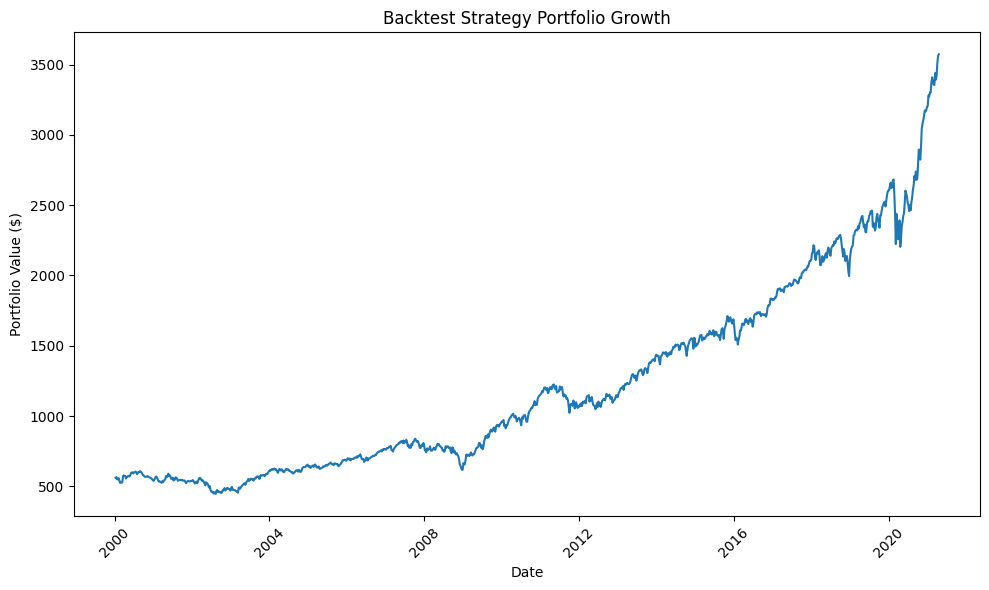

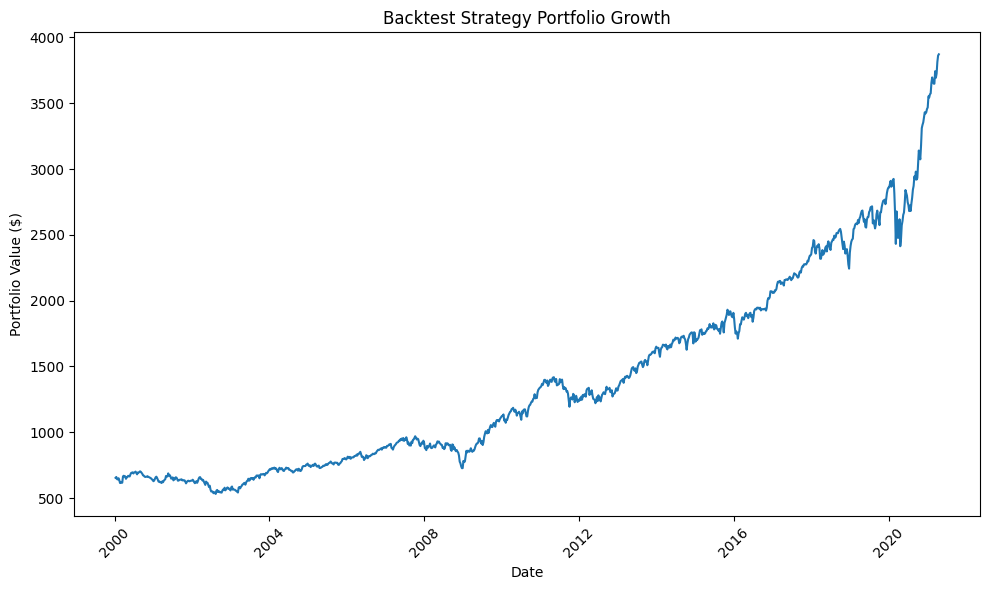

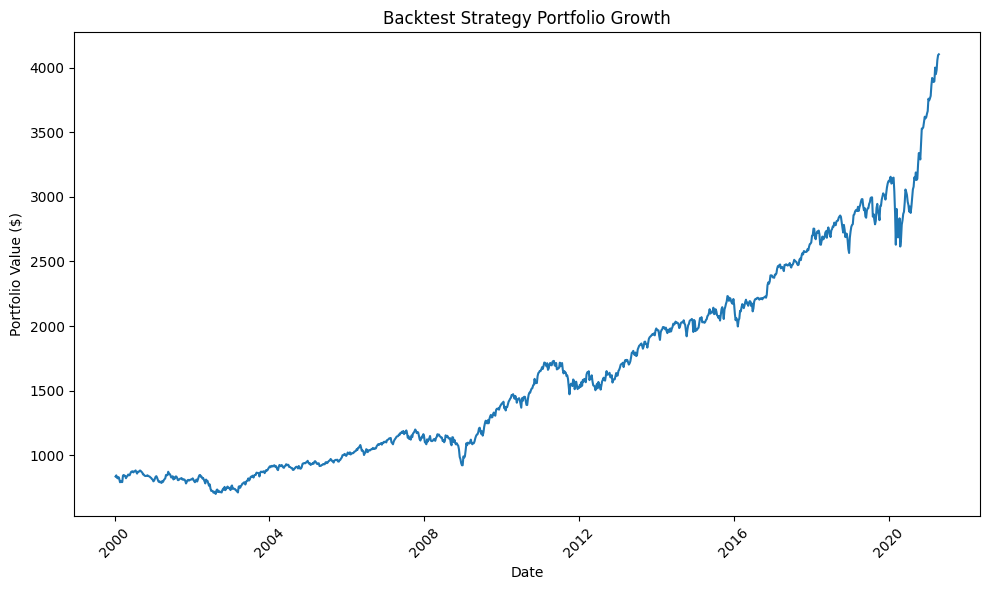

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def backtest_strategy(data, risk_level):
    # Convert custom data dictionary to DataFrame
    custom_df = pd.DataFrame(data)

    # Initialize lists to track portfolio values and total wealth over time
    portfolio_values = []
    total_wealth = 1000

    # Loop through each data point (assuming we are predicting the market each day)
    for i in range(len(custom_df)):

        current_data = {col: [custom_df.iloc[i][col]] for col in custom_df.columns}  # Convert current row values to lists
        previous_data = {col: [custom_df.iloc[i-1][col]] for col in custom_df.columns}  # Convert previous row values to lists

        # Get the portfolio allocation based on the investment strategy
        portfolio = investment_strategy(risk_level, 10, current_data)

        # Simulate asset returns based on the price changes from the previous day
        equity_return = (current_data['MXUS'][0] - previous_data['MXUS'][0]) / previous_data['MXUS'][0]  # Equities
        bond_return = (current_data['USGG30YR'][0] - previous_data['USGG30YR'][0]) / previous_data['USGG30YR'][0]  # Bonds
        gold_return = (current_data['XAU BGNL'][0] - previous_data['XAU BGNL'][0]) / previous_data['XAU BGNL'][0]  # Gold
        cash_return = (current_data['DXY'][0] - previous_data['DXY'][0]) / previous_data['DXY'][0]  # Cash (based on USD index)

        # Calculate daily asset values with returns
        equity_value = portfolio['equities'] * total_wealth * (1 + equity_return)
        bond_value = portfolio['bonds'] * total_wealth * (1 + bond_return)
        gold_value = portfolio['gold'] * total_wealth * (1 + gold_return)
        cash_value = portfolio['cash'] * total_wealth * (1 + cash_return)

        # Total wealth at the end of the day
        total_wealth = equity_value + bond_value + gold_value + cash_value

        # Store the portfolio value for this day
        portfolio_values.append(total_wealth)

    # Plot portfolio growth over time
    plt.figure(figsize=(10, 6))


    # Ensure 'Date' is converted to datetime if it's not already
    custom_df['Data'] = pd.to_datetime(custom_df['Data'], format='%m/%d/%Y')

    plt.plot(custom_df['Data'], portfolio_values)  # Plot portfolio values with dates

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.title('Backtest Strategy Portfolio Growth')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    # plt.show()

    # Return the final portfolio value
    return portfolio_values

columns = ['VIX', 'USGG30YR', 'USGG2YR', 'USGG3M', 'US0001M', 'DXY', 'XAU BGNL', 'CRY', 'MXUS', 'Data']

# Convert the relevant columns from the DataFrame to the custom data format
custom_data = {col: df[col].tolist() for col in columns}

# Example usage with the custom data
portfolio_values = backtest_strategy(custom_data, risk_level=0.9)
# print(portfolio_values)
print(f"Final portfolio value: ${portfolio_values[-1]:,.2f}")
portfolio_values = backtest_strategy(custom_data, risk_level=0.5)
# print(portfolio_values)
print(f"Final portfolio value: ${portfolio_values[-1]:,.2f}")
portfolio_values = backtest_strategy(custom_data, risk_level=0.1)
# print(portfolio_values)
print(f"Final portfolio value: ${portfolio_values[-1]:,.2f}")


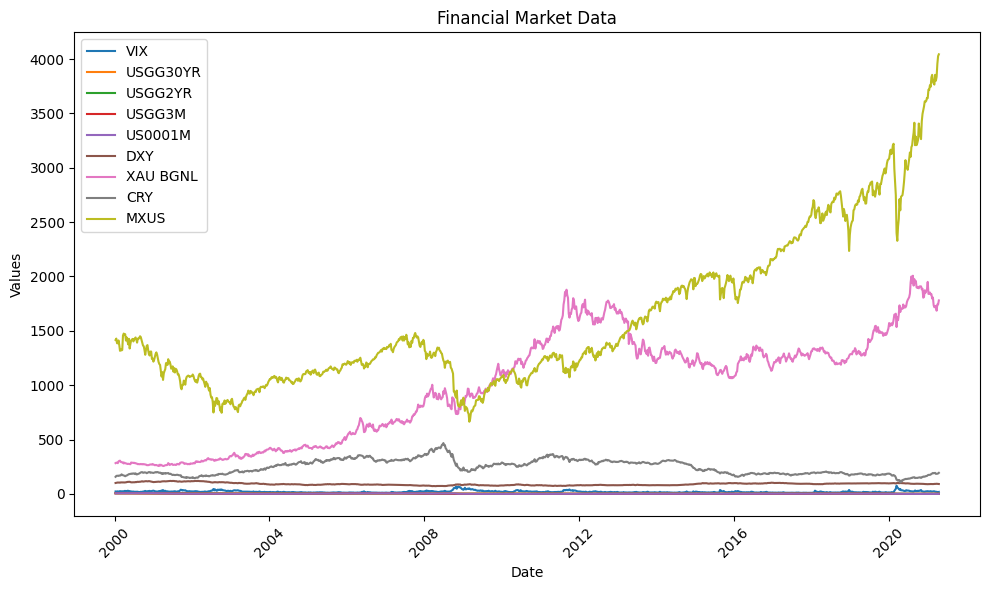

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('financialMarketData.csv')

# Ensure the 'Date' column is parsed as a datetime type
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y')

# Set the 'Date' column as the index of the DataFrame
df.set_index('Data', inplace=True)

# Specify the columns you want to plot
columns = ['VIX', 'USGG30YR', 'USGG2YR', 'USGG3M', 'US0001M', 'DXY', 'XAU BGNL', 'CRY', 'MXUS']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each column in the same graph
for col in columns:
    plt.plot(df.index, df[col], label=col)  # Plot using the Date as the x-axis

# Add labels and title
plt.title('Financial Market Data')
plt.xlabel('Date')
plt.ylabel('Values')

# Display legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Test Code

[datetime.datetime(2014, 5, 6, 0, 0), datetime.datetime(2014, 5, 7, 0, 0), datetime.datetime(2014, 5, 8, 0, 0), datetime.datetime(2014, 5, 9, 0, 0), datetime.datetime(2014, 5, 10, 0, 0), datetime.datetime(2014, 5, 11, 0, 0), datetime.datetime(2014, 5, 12, 0, 0), datetime.datetime(2014, 5, 13, 0, 0)]


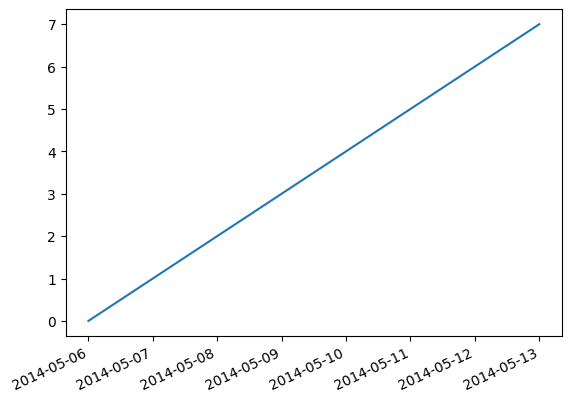

In [44]:
datelist =  ['2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-10',    '2014-05-11', '2014-05-12', '2014-05-13']

import matplotlib
from matplotlib import pyplot
from matplotlib import dates
import datetime

converted_dates = list(map(datetime.datetime.strptime, datelist, len(datelist)*['%Y-%m-%d']))
print(converted_dates)
x_axis = converted_dates
formatter = dates.DateFormatter('%Y-%m-%d')


y_axis = range(0,8)
pyplot.plot( x_axis, y_axis, '-' )
ax = pyplot.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
pyplot.gcf().autofmt_xdate(rotation=25)
pyplot.show()

In [45]:
## Reloading the the trained model
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the function to load the model and scaler
def load_model_and_scaler():
    # Load the logistic regression model using joblib
    model = joblib.load('logistic_regression_model.pkl')

    # Load the scaler
    scaler = joblib.load('scaler.pkl')

    return model, scaler

# Load the model and scaler
model, scaler = load_model_and_scaler()

# Ensure that 'df' is loaded with your data, for example:
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% train, 20% test)
X = df[selected_features]  # Features (input data)
y = df['Y']    # Target (output labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the X_test using the loaded scaler
X_test_scaled = scaler.transform(X_test)  # Using the scaler loaded previously

# Use the loaded model to make predictions
y_pred_loaded_model = model.predict(X_test_scaled)

# Evaluate the loaded model
print("Accuracy:", accuracy_score(y_test, y_pred_loaded_model))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_loaded_model))
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded_model))


Accuracy: 0.8789237668161435
Confusion Matrix:
[[168   9]
 [ 18  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       177
           1       0.76      0.61      0.67        46

    accuracy                           0.88       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.87      0.88      0.87       223



# Anomaly Detection tutorial with unsupervised learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [ ]:
# Create a synthetic dataset with normal and anomalous data points
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=42, cluster_std=1.0)
anomalies = np.array([[5, 5], [6, 6], [7, 7]])

In [ ]:
# Combine the normal data and anomalies
X = np.vstack([X, anomalies])

In [ ]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.title("Synthetic Dataset")
plt.show()

In [ ]:
# Apply DBSCAN for anomaly detection with increased epsilon
dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
labels = dbscan.fit_predict(X)

# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

In [ ]:
# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

In [ ]:
# Visualize the anomalies
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

In [ ]:
# Print the identified anomalies
print("Identified Anomalies:")
print(anomalies)